In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# importing my dataset
data = pd.read_csv("../../dataset/fraud_data.csv")
data.sample(5) # looking at some random samples from the dataset to understand the content

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
4791,3489712,0,13183713,35.95,W,12839,321.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31018,3094686,0,2137627,226.00,W,9684,514.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23425,3284919,0,7350270,39.00,W,8135,247.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10474,3538910,0,14584464,311.95,W,4984,390.0,150.0,mastercard,195.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3320,3207016,0,5169121,67.95,W,16132,111.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Understanding

In [4]:
# checking for missing values
cols_with_missing = data.isnull().sum()
print("*"*5, "Columns with corresponding missing values", "*"*5)
print(cols_with_missing[cols_with_missing > 0])
print("*"*5, "Proportion with missing values", "*"*5)
print(cols_with_missing[cols_with_missing > 0]/data.shape[0])

***** Columns with corresponding missing values *****
card2           915
card3           158
card4           162
card5           444
card6           159
              ...  
id_36         44849
id_37         44849
id_38         44849
DeviceType    44869
DeviceInfo    47133
Length: 414, dtype: int64
***** Proportion with missing values *****
card2         0.015494
card3         0.002676
card4         0.002743
card5         0.007519
card6         0.002692
                ...   
id_36         0.759457
id_37         0.759457
id_38         0.759457
DeviceType    0.759796
DeviceInfo    0.798134
Length: 414, dtype: float64


In [5]:
# Descriptive statistics of numeric columns
data.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,5.905400e+04,59054.000000,5.905400e+04,59054.000000,59054.000000,58139.000000,58896.000000,58610.000000,52326.000000,52326.000000,...,14061.00000,4511.000000,14059.000000,14054.000000,525.000000,525.000000,487.000000,524.000000,525.000000,7715.000000
mean,3.282166e+06,0.033952,7.368220e+06,134.142888,9910.366360,362.438054,153.264551,199.104231,290.653939,86.806616,...,189.89958,14.238750,351.767622,404.594777,385.257143,15.748571,12.739220,326.225191,148.794286,26.499028
std,1.702573e+05,0.181107,4.612063e+06,233.112295,4893.704524,157.360648,11.395609,41.296438,101.796538,2.639572,...,30.34787,1.524658,141.600677,152.201538,213.565534,6.496154,2.275238,97.662855,31.168092,3.739140
min,2.987019e+06,0.000000,8.673000e+04,0.292000,1008.000000,100.000000,100.000000,100.000000,100.000000,13.000000,...,100.00000,11.000000,100.000000,100.000000,114.000000,14.000000,11.000000,100.000000,100.000000,0.000000
25%,3.135748e+06,0.000000,3.074217e+06,42.950000,6019.000000,215.000000,150.000000,166.000000,204.000000,87.000000,...,166.00000,13.000000,266.000000,256.000000,252.000000,14.000000,11.000000,321.000000,119.000000,24.000000
50%,3.282062e+06,0.000000,7.288450e+06,68.017000,9749.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,166.00000,15.000000,339.000000,484.000000,252.000000,14.000000,11.000000,321.000000,147.000000,24.000000
75%,3.429699e+06,0.000000,1.123918e+07,117.000000,14223.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,225.00000,15.000000,427.000000,533.000000,554.000000,14.000000,15.000000,361.000000,169.000000,32.000000
max,3.577536e+06,1.000000,1.581105e+07,5279.950000,18390.000000,600.000000,229.000000,237.000000,536.000000,102.000000,...,225.00000,29.000000,670.000000,660.000000,854.000000,43.000000,24.000000,548.000000,216.000000,32.000000


***** Unique Values of Card4 *****
card4
visa                38343
mastercard          19042
american express      831
discover              676
Name: count, dtype: int64
***** Proportions *****
card4
visa                65.107315
mastercard          32.333763
american express     1.411058
discover             1.147864
Name: proportion, dtype: float64
isFraud
0    57049
1     2005
Name: count, dtype: int64
***** Unique Values of isFraud *****
isFraud
0    57049
1     2005
Name: count, dtype: int64
***** Proportions *****
isFraud
0    96.604802
1     3.395198
Name: proportion, dtype: float64


<Axes: ylabel='count'>

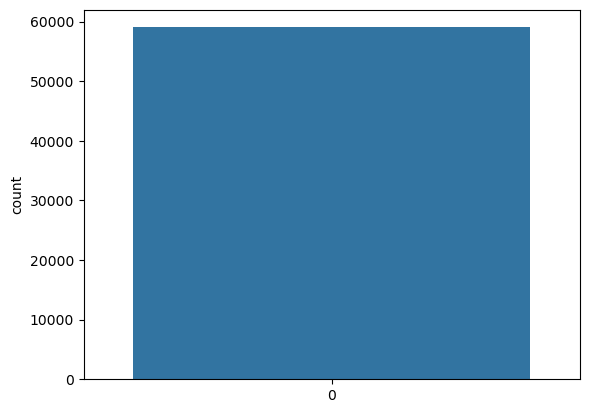

In [6]:
# understanding unique values in the card4 column
print("*"*5, "Unique Values of Card4","*"*5)
print(data["card4"].value_counts())
print("*"*5, "Proportions","*"*5)
print(data["card4"].value_counts(normalize=True)*100)
print(data.isFraud.value_counts())
print("*"*5, "Unique Values of isFraud","*"*5)
print(data.isFraud.value_counts())
print("*"*5, "Proportions","*"*5)
print(data.isFraud.value_counts(normalize=True)*100)
sns.countplot(data.isFraud)

In [7]:
# Deleting unwanted columns
# data.drop([data[cols_with_missing]/data.shape[0] > 0.7])
# refactoring the index to transaction id
# data = data.set_index("TransactionID")

In [8]:
from sklearn.impute import SimpleImputer

categorical_imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
categorical_imputer = categorical_imputer.fit(data[["card4"]])
data["card4"] = categorical_imputer.transform(data[["card4"]]).ravel()

In [9]:
data

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2994681,0,242834,25.000,H,9803,583.0,150.0,visa,226.0,...,firefox 56.0,24.0,1920x1080,match_status:2,T,F,T,T,desktop,rv:56.0
1,3557242,0,15123000,117.000,W,7919,194.0,150.0,mastercard,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3327470,0,8378575,73.773,C,12778,500.0,185.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3118781,0,2607840,400.000,R,12316,548.0,150.0,visa,195.0,...,mobile safari generic,32.0,1136x640,match_status:2,T,F,T,F,mobile,iOS Device
4,3459772,0,12226544,31.950,W,9002,453.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59049,3549150,0,14898396,335.000,W,2616,327.0,150.0,discover,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59050,3497600,0,13371647,20.950,W,3277,111.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59051,3575755,0,15775109,59.000,W,9486,127.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59052,3521246,0,14071016,25.950,W,2392,360.0,150.0,mastercard,126.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# def outliers(s, k=1.5, return_threshold=False):
#     # calculate the inter-quartile range
#     q25, q75 = np.percentile(s, 25), np.percentile(s, 75)
#     iqr = q75 - q25

#     # calculate the outlier cutoff
#     cutoff = iqr * k
#     lower, upper = q25 - cutoff, q75 - cutoff
#     print(lower, upper)
#     if return_threshold:
#         return lower, upper
#     else: # identify the outlier
#         return [True if x < lower or x > upper else False for x in s]

<Axes: xlabel='TransactionAmt', ylabel='card4'>

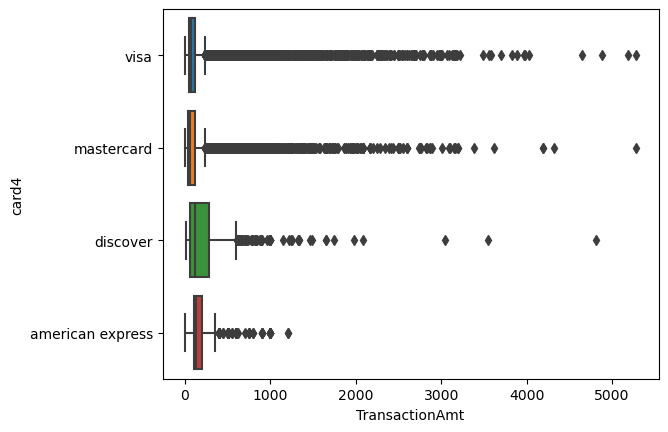

In [11]:
# IQR for card4
sns.boxplot(x="TransactionAmt",y="card4", data=data, whis=1.5)

In [12]:
# Determining the binning width
amt_range = data.TransactionAmt.max() - data.TransactionAmt.min()
min_value = int(np.floor(data.TransactionAmt.min()))
max_value = int(np.ceil(data.TransactionAmt.max()))

# rounding the bin width
bin_value = int(np.round(amt_range/5))

min_value, max_value, bin_value

(0, 5280, 1056)

In [13]:
# filling missing values of numerical columns with mean value
num_cols = data.select_dtypes(include=np.number).columns
data[num_cols] = data[num_cols].fillna(data[num_cols].mean())

# getting all the categorical columns
cat_cols = data.select_dtypes(include="object").columns

# fills the missing values with maximum occuring element in the columns
data[cat_cols] = data[cat_cols].fillna(data[cat_cols].mode().iloc[0])

In [14]:
data = pd.get_dummies(data, columns=cat_cols)
data.sample(5)

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,DeviceInfo_rv:54.0,DeviceInfo_rv:55.0,DeviceInfo_rv:56.0,DeviceInfo_rv:57.0,DeviceInfo_rv:58.0,DeviceInfo_rv:59.0,DeviceInfo_rv:60.0,DeviceInfo_verykools4009,DeviceInfo_verykools5034,DeviceInfo_vivo
12150,3455213,0,12072682,47.95,16485,174.0,150.0,226.0,330.0,87.0,...,False,False,False,False,False,False,False,False,False,False
44633,3486084,0,13094832,214.95,8528,215.0,150.0,226.0,387.0,87.0,...,False,False,False,False,False,False,False,False,False,False
55399,3100641,0,2217226,100.00,8813,555.0,150.0,226.0,269.0,87.0,...,False,False,False,False,False,False,False,False,False,False
40445,3062161,0,1644993,210.95,4141,404.0,150.0,102.0,502.0,87.0,...,False,False,False,False,False,False,False,False,False,False
40983,3528185,0,14261990,67.95,7508,321.0,150.0,226.0,444.0,87.0,...,False,False,False,False,False,False,False,False,False,False


In [15]:
# separating input features and output feature
X = data.drop(columns=["isFraud"]) # inputs
Y = data.isFraud # output

In [16]:
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(X)
scaled_features = pd.DataFrame(data=scaled_features)
scaled_features.columns = X.columns

# Splitting the data

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Dealing with imbalanced data

In [18]:
# from imblearn.over_sampling import SMOTE
# from smote import SMOTE

# sm = SMOTE(random_state=25, sampling_strategy=1.0)
# x_train, y_train = sm.fit_sample(x_train, y_train)
from sklearn.utils import resample

x_train, y_train = resample(x_train, y_train, random_state=42)

# Model Building

### Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()

In [20]:
lin_model.fit(x_train, y_train)

LinearRegression()

In [21]:
# from sklearn.model_selection import GridSearchCV
lin_prediction = lin_model.predict(x_test)
lin_prediction = [1 if i >= 0.5 else 0 for i in lin_prediction]

In [22]:
from sklearn.metrics import accuracy_score, roc_auc_score
print("Accuracy of Linear Regression: ", accuracy_score(y_test, lin_prediction)*100)
print("AUC-ROC score of Linear Regression: ", roc_auc_score(y_test, lin_prediction)*100)

Accuracy of Linear Regression:  96.90966048598764
AUC-ROC score of Linear Regression:  58.86768497412018


### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(x_train, y_train)

C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
log_pred = log_model.predict(x_test)
print("Accuracy of Logistic Regression: ", accuracy_score(y_test, log_pred)*100)
print("AUC-ROC score of Logistic Regression: ", roc_auc_score(y_test, log_pred)*100)

Accuracy of Logistic Regression:  96.56252645838626
AUC-ROC score of Logistic Regression:  50.233762607074894


### Naive Bayes Classifier

In [25]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

GaussianNB()

In [26]:
nb_pred = nb_model.predict(x_test)
print("Accuracy of Naive Bayes: ", accuracy_score(y_test, nb_pred)*100)
print("AUC-ROC score of Naive Bayes: ", roc_auc_score(y_test, nb_pred)*100)

Accuracy of Naive Bayes:  6.129878926424519
AUC-ROC score of Naive Bayes:  49.25507043076743


### Support Vector Machine

In [27]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(x_train, y_train)

SVC()

In [28]:
svm_pred = svm_model.predict(x_test)
print("Accuracy of Support Vector Machine: ", accuracy_score(y_test, svm_pred)*100)
print("AUC-ROC score of Support Vector Machine: ", roc_auc_score(y_test, svm_pred)*100)

Accuracy of Support Vector Machine:  96.57099314198628
AUC-ROC score of Support Vector Machine:  50.0


### Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [30]:
rf_pred_proba = rf_model.predict_proba(x_test)[:,1]
rf_pred = rf_model.predict(x_test)
print("Accuracy of Random Forest: ", accuracy_score(y_test, rf_pred)*100)
print("AUC-ROC score of Random Forest: ", roc_auc_score(y_test, rf_pred_proba)*100)

Accuracy of Random Forest:  97.31606129878926
AUC-ROC score of Random Forest:  88.20884827781782


In [31]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
}

In [ ]:
grid_search_rf = GridSearchCV(rf, param_grid, scoring="roc_auc", cv=5)
grid_search_rf.fit(x_train, y_train)

In [ ]:
result_rf = grid_search.cv_results_
mean_auc_score_rf = result["mean_test_score"]
params = result["params"]

In [ ]:
x_ticks = np.arange(len(params))
plt.figure(figsize=(10, 6))
plt.plot(x_ticks, mean_auc_scores_rf)
plt.xticks(x_ticks, [str(  param) for param in params], rotation=90)
plt.xlabel('Parameter Combinations')
plt.ylabel('AUC Score')
plt.title('AUC Scores for Different Parameter Combinations')
plt.tight_layout()
plt.show()

## Decision Tree Tuning

In [38]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
}

decision_tree = DecisionTreeClassifier()

In [39]:
grid_search = GridSearchCV(decision_tree, param_grid,scoring="roc_auc", cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7, 8, 10, 12],
                         'min_samples_leaf': [1, 3, 4, 5, 6, 8],
                         'min_samples_split': [2, 5, 7, 10, 12, 15, 17]},
             scoring='roc_auc')

In [40]:
result = grid_search.cv_results_
mean_auc_score = result["mean_test_score"]
params = result["params"]

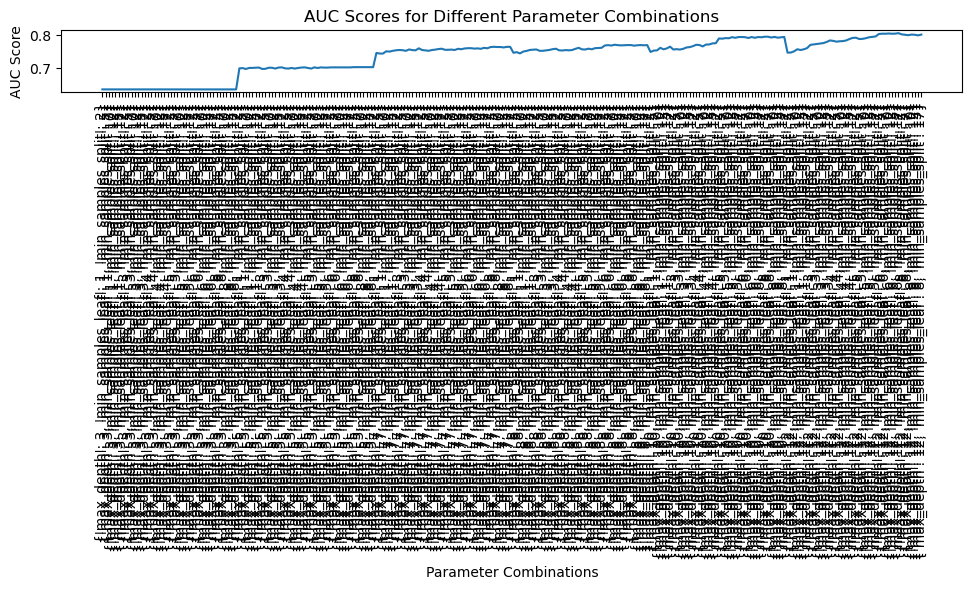

In [41]:
x_ticks = np.arange(len(params))
plt.figure(figsize=(10, 6))
plt.plot(x_ticks, mean_auc_score)
plt.xticks(x_ticks, [str(param) for param in params], rotation=90)
plt.xlabel('Parameter Combinations')
plt.ylabel('AUC Score')
plt.title('AUC Scores for Different Parameter Combinations')
plt.tight_layout()
plt.show()

In [42]:
# getting the best parameters
best_params = grid_search.best_params_
print(best_params)
best_auc_score = grid_search.best_score_
print(best_auc_score)

{'max_depth': 12, 'min_samples_leaf': 6, 'min_samples_split': 17}
0.8066672482499662


## Fine Tuning Random Forest